In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [5]:
from google.colab import drive

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from joblib import dump, load

In [31]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/company.csv'
data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
print(data.head())

   employee_id   department     salary years_at_company  age  \
0            1        Sales     60,000                5   30   
1            2  Engineering     95.000                8   35   
2            3           HR        45K          2 years   28   
3            4    Marketing        75K               10   40   
4            5           IT  50,000.00          3 years   25   

   job_satisfaction  performance_score  last_promotion_year education_level  \
0                 7                 85                 2018        Bachelor   
1                 8                 90                 2017          Master   
2                 6                 70                 2020        Bachelor   
3                 9                 95                 2015          Master   
4                 5                 60                 2011        Bachelor   

   gender   hired_date  
0    Male   15-06-2015  
1       F  01-Sep-2012  
2  Female   23-04-2019  
3       M  10-Feb-2010  
4    Male     1

In [11]:
# ranje champs salaire
data['salary'] = data['salary'].replace({'\$': '', ',': '', 'K': '000', 'k': '000'}, regex=True).astype(float)
print(data['salary'])

0     60000.0
1        95.0
2     45000.0
3     75000.0
4     50000.0
5     85000.0
6        70.0
7        55.0
8        48.0
9     40000.0
10       80.0
11       52.0
12    57000.0
13    70000.0
14    55000.0
15    48000.0
16    40000.0
17    80000.0
18    52000.0
19    57000.0
20    72000.0
21    42000.0
22    90000.0
23    55000.0
24    60000.0
25    75000.0
26    45000.0
27    50000.0
28        NaN
29    70000.0
30    55000.0
31    48000.0
32    40000.0
33    78000.0
34    63000.0
35    48000.0
36    42000.0
37    35000.0
38    82000.0
39    53000.0
40    58000.0
41    73000.0
42    43000.0
43    88000.0
44    55000.0
45    60000.0
46    75000.0
Name: salary, dtype: float64


In [12]:
# range champs years_at_company
data['years_at_company'] = data['years_at_company'].replace({' years': '', ' year': ''}, regex=True).astype(int)
print(data['years_at_company'])

0      5
1      8
2      2
3     10
4      3
5      6
6      7
7      4
8      2
9      1
10     5
11     3
12     5
13     8
14     2
15     7
16     4
17     6
18    10
19     2
20     3
21     6
22     7
23     4
24     2
25     1
26     4
27     5
28     2
29     1
30     1
31     6
32     3
33     5
34     8
35     2
36     7
37     4
38     6
39    10
40     2
41     3
42     6
43     7
44     4
45     2
46     1
Name: years_at_company, dtype: int64


In [13]:
# mete type yo en entier
data['age'] = data['age'].astype(int)
data['last_promotion_year'] = data['last_promotion_year'].astype(int)
data['job_satisfaction'] = data['job_satisfaction'].astype(int)
data['performance_score'] = data['performance_score'].astype(int)

In [15]:
# ranje champs genre
data['gender'] = data['gender'].replace({'Male': 'M', 'Female': 'F'}, regex=True)
print(data['gender'])

0     M
1     F
2     F
3     M
4     M
5     M
6     F
7     M
8     F
9     F
10    M
11    M
12    F
13    M
14    F
15    F
16    M
17    M
18    M
19    F
20    M
21    M
22    F
23    M
24    F
25    F
26    M
27    F
28    M
29    F
30    M
31    M
32    M
33    F
34    M
35    F
36    F
37    M
38    M
39    M
40    F
41    M
42    M
43    F
44    M
45    F
46    F
Name: gender, dtype: object


In [16]:
# ranje champs salaire
data['education_level'] = data['education_level'].replace({'': 'NaN'}, regex=True)
print(data['education_level'])

0     Bachelor
1       Master
2     Bachelor
3       Master
4     Bachelor
5       Master
6     Bachelor
7     Bachelor
8       Master
9     Bachelor
10      Master
11    Bachelor
12      Master
13    Bachelor
14      Master
15    Bachelor
16      Master
17    Bachelor
18      Master
19    Bachelor
20    Bachelor
21      Master
22    Bachelor
23    Bachelor
24      Master
25    Bachelor
26      Master
27    Bachelor
28    Bachelor
29      Master
30    Bachelor
31      Master
32    Bachelor
33      Master
34         NaN
35      Master
36    Bachelor
37      Master
38    Bachelor
39      Master
40    Bachelor
41         NaN
42      Master
43    Bachelor
44    Bachelor
45      Master
46    Bachelor
Name: education_level, dtype: object


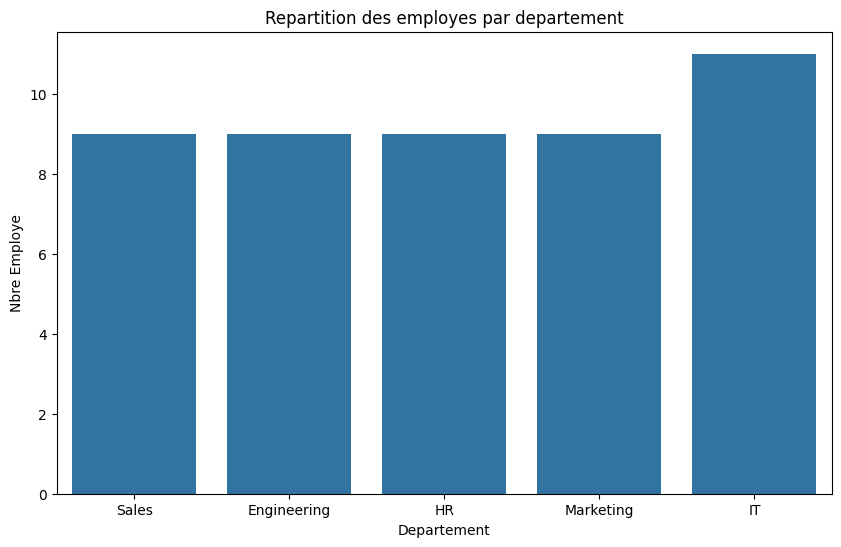

In [17]:
# employe pa departement
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='department')
plt.title('Repartition des employes par departement')
plt.xlabel('Departement')
plt.ylabel('Nbre Employe')
plt.show()

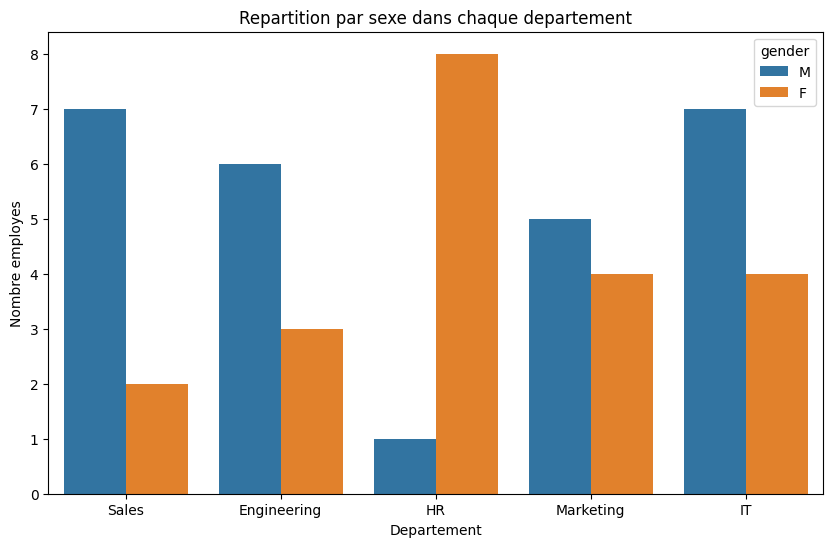

In [18]:
# repartition des sexes par departement
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='department', hue='gender')
plt.title('Repartition par sexe dans chaque departement')
plt.xlabel('Departement')
plt.ylabel('Nombre employes')
plt.show()

In [19]:
# moyenne age par departement
MoyAgeDept = data.groupby('department')['age'].mean().reset_index()
print(MoyAgeDept)

    department        age
0  Engineering  32.777778
1           HR  25.444444
2           IT  26.090909
3    Marketing  38.000000
4        Sales  29.444444


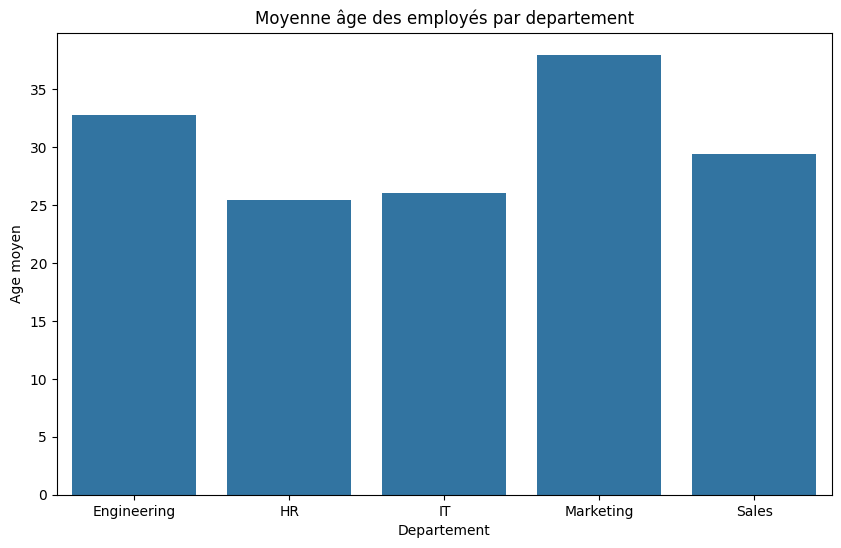

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=MoyAgeDept, x='department', y='age')
plt.title('Moyenne âge des employés par departement')
plt.xlabel('Departement')
plt.ylabel('Age moyen')
plt.show()

In [21]:
# Moyenne des salaires
MoySalDep = data.groupby('department')['salary'].mean().reset_index()
print(MoySalDep)


    department        salary
0  Engineering  39241.666667
1           HR  56444.444444
2           IT  45463.636364
3    Marketing  60118.888889
4        Sales  58381.875000


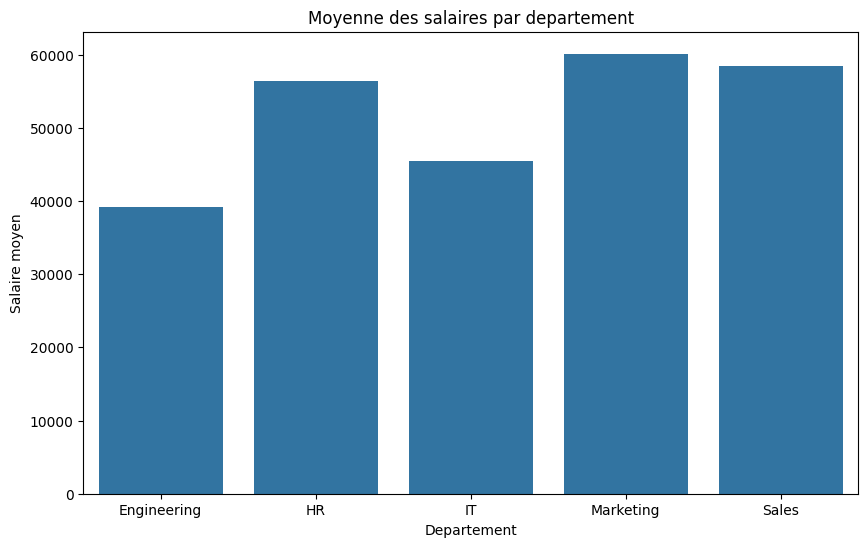

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=MoySalDep, x='department', y='salary')
plt.title('Moyenne des salaires par departement')
plt.xlabel('Departement')
plt.ylabel('Salaire moyen')
plt.show()

In [23]:
# Satisfaction par departement
SatisfactionDep = data.groupby('department')['job_satisfaction'].mean().reset_index()
print(SatisfactionDep)

    department  job_satisfaction
0  Engineering          7.222222
1           HR          4.777778
2           IT          5.090909
3    Marketing          8.222222
4        Sales          6.222222


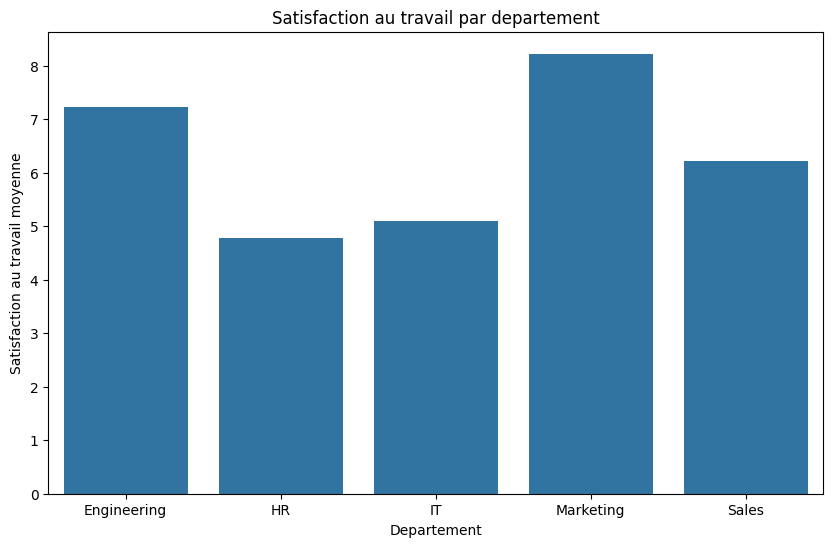

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(data=SatisfactionDep, x='department', y='job_satisfaction')
plt.title('Satisfaction au travail par departement')
plt.xlabel('Departement')
plt.ylabel('Satisfaction au travail moyenne')
plt.show()

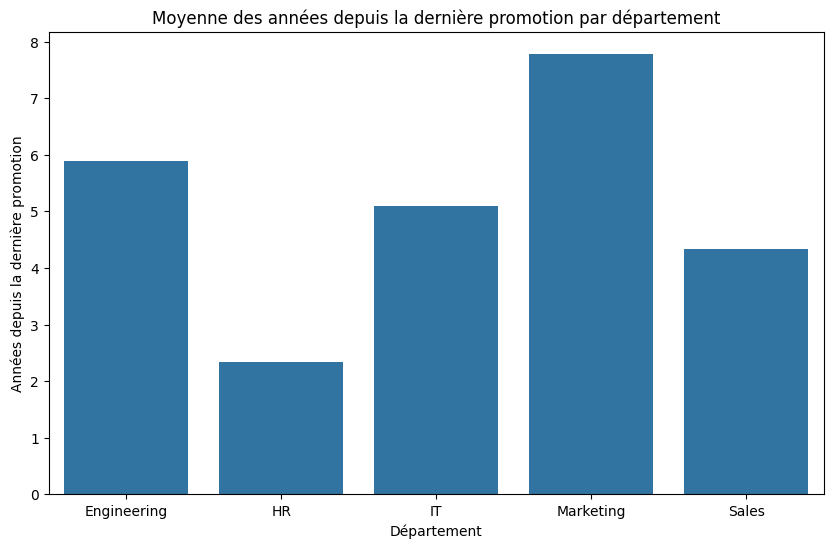

In [26]:
# Moyenne dernier promo par departement
data['last_promotion'] = 2024 - data['last_promotion_year']
moyenne_temps_promotion = data.groupby('department')['last_promotion'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=moyenne_temps_promotion, x='department', y='last_promotion')
plt.title('Moyenne des années depuis la dernière promotion par département')
plt.xlabel('Département')
plt.ylabel('Années depuis la dernière promotion')
plt.show()

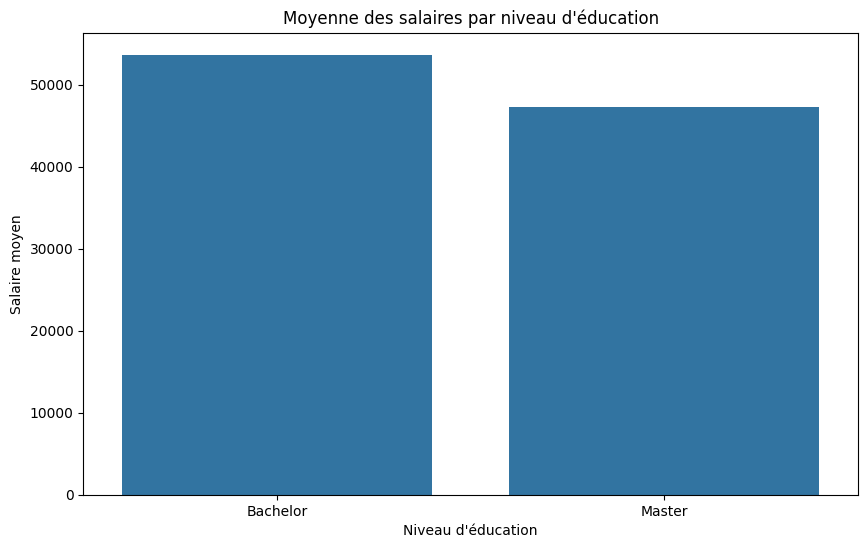

In [27]:
# moyenne Salaire Par education
MoySalEduc = data.groupby('education_level')['salary'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=MoySalEduc, x='education_level', y='salary')
plt.title('Moyenne des salaires par niveau d\'éducation')
plt.xlabel('Niveau d\'éducation')
plt.ylabel('Salaire moyen')
plt.show()

In [29]:
def transform_date(date_str):
    # Conveti champs date yo en  datetime
    date_obj = pd.to_datetime(date_str, errors='coerce')


    if pd.isna(date_obj):
        return date_str
    else:
        return date_obj.strftime('%d-%m-%Y')


data['hired_date'] = data['hired_date'].apply(transform_date)


print(data.head())

   employee_id   department   salary  years_at_company  age  job_satisfaction  \
0            1        Sales  60000.0                 5   30                 7   
1            2  Engineering     95.0                 8   35                 8   
2            3           HR  45000.0                 2   28                 6   
3            4    Marketing  75000.0                10   40                 9   
4            5           IT  50000.0                 3   25                 5   

   performance_score  last_promotion_year education_level gender  hired_date  \
0                 85                 2018        Bachelor      M  15-06-2015   
1                 90                 2017          Master      F  01-09-2012   
2                 70                 2020        Bachelor      F  23-04-2019   
3                 95                 2015          Master      M  10-02-2010   
4                 60                 2011        Bachelor      M  18-07-2018   

   last_promotion  
0           

<ipython-input-29-cd7a5f2b7c76>:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date_obj = pd.to_datetime(date_str, errors='coerce')


In [32]:
# moyenne marie par departement

marie_departement = data.groupby(['department', 'etat_civil']).size().reset_index(name='count')

print(marie_departement)

     department   etat_civil  count
0   Engineering  Celibataire      4
1   Engineering      Divorce      1
2   Engineering        Marie      3
3   Engineering        marie      1
4            HR  Celibataire      1
5            HR      Divorce      6
6            HR        Marie      2
7            IT  Celibataire      5
8            IT      Divorce      1
9            IT        Marie      4
10           IT        marie      1
11    Marketing  Celibataire      3
12    Marketing        Marie      5
13    Marketing        marie      1
14        Sales      Divorce      2
15        Sales        Marie      6
16        Sales        marie      1


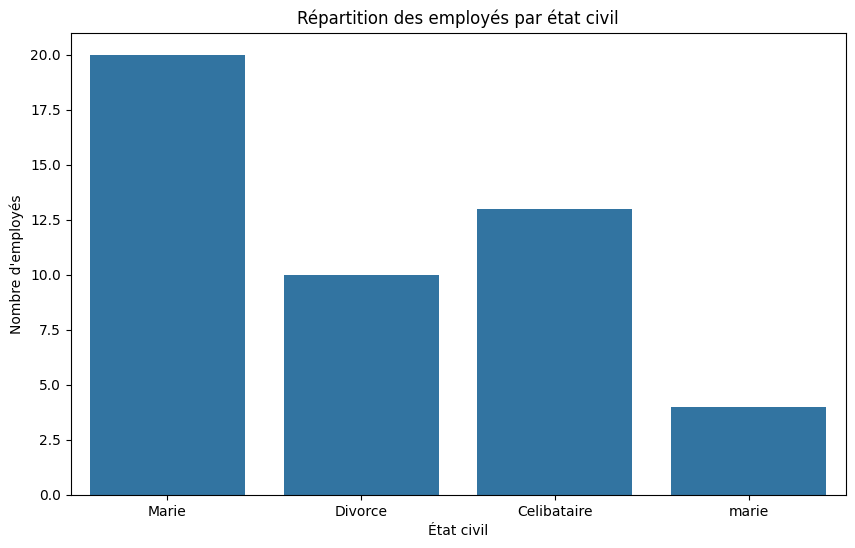

In [33]:
# repartition par etat civil
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='etat_civil')
plt.title('Répartition des employés par état civil')
plt.xlabel('État civil')
plt.ylabel('Nombre d\'employés')
plt.show()

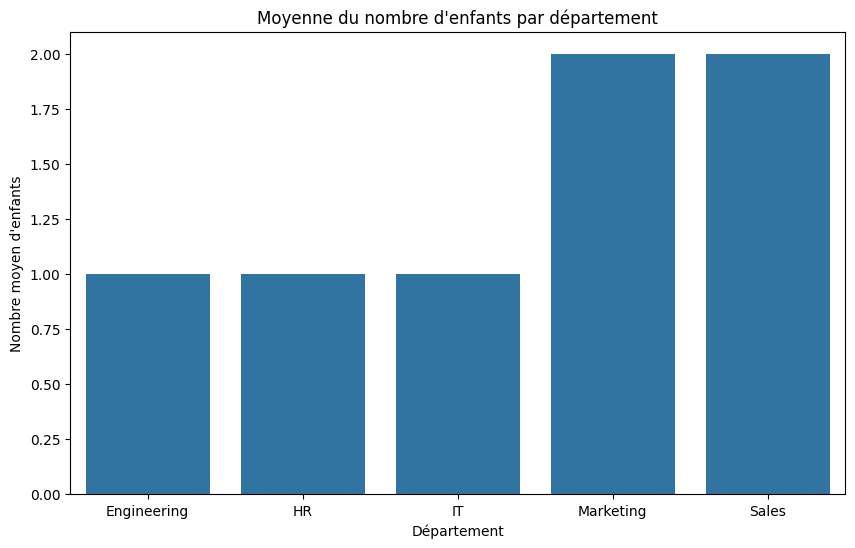

In [34]:
# enfants des employe par departements
enfants_departement = data.groupby('department')['enfants'].mean().reset_index()

enfants_departement['enfants'] = enfants_departement['enfants'].astype(int)


plt.figure(figsize=(10, 6))
sns.barplot(data=enfants_departement, x='department', y='enfants')
plt.title('Moyenne du nombre d\'enfants par département')
plt.xlabel('Département')
plt.ylabel('Nombre moyen d\'enfants')
plt.show()

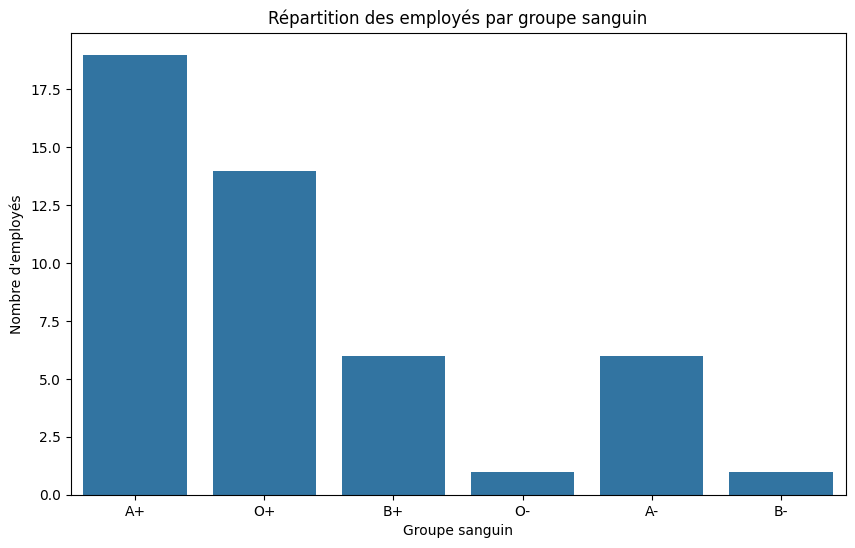

In [35]:
# employe par groupe sanguin
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='groupe_sanguin')
plt.title('Répartition des employés par groupe sanguin')
plt.xlabel('Groupe sanguin')
plt.ylabel('Nombre d\'employés')
plt.show()